поле для эксперементов xddd

In [82]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer

In [83]:
trein = pd.read_csv('../csv_file/train.csv')
test = pd.read_csv("../csv_file/valid.csv")

C:\Users\josha\AppData\Local\Temp\ipykernel_27460\2174524898.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,145

In [84]:
df = trein.loc[:, ~trein.T.duplicated()]
print(df)


      report_date  client_id  target  col1  col2  col3  col4  col5  col7  \
0      2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   
1      2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   
2      2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   
3      2022-09-01          7       0   NaN   NaN   NaN   NaN   NaN   NaN   
4      2022-08-01          8       0   NaN   NaN   NaN   NaN   NaN   NaN   
...           ...        ...     ...   ...   ...   ...   ...   ...   ...   
14451  2022-07-01       1241       0   NaN   NaN   NaN   NaN   NaN   NaN   
14452  2022-09-01       1969       1   NaN   NaN   NaN   NaN   NaN   NaN   
14453  2022-02-01       7116       1   NaN   NaN   NaN   NaN   NaN   NaN   
14454  2021-08-01       7117       0   NaN   NaN   NaN   NaN   NaN   NaN   
14455  2022-03-01        849       0   NaN   NaN   NaN   NaN   NaN   NaN   

       col8  ...    col2654    col2655    col2656  col2657  col2658  col2659  \
0      

In [85]:
threshold = 0.90
ydal = int(len(df) * (1 - threshold))
df_tren = df.dropna(axis=1,thresh=ydal)
print(df_tren)

      report_date  client_id  target   col476   col480     col484   col488  \
0      2022-11-01          1       0      NaN      NaN        NaN      NaN   
1      2022-11-01          5       0  55.7483  55.7483  55.748299  55.7483   
2      2022-05-01          6       0      NaN      NaN        NaN      NaN   
3      2022-09-01          7       0      NaN      NaN        NaN      NaN   
4      2022-08-01          8       0      NaN      NaN        NaN      NaN   
...           ...        ...     ...      ...      ...        ...      ...   
14451  2022-07-01       1241       0      NaN      NaN        NaN      NaN   
14452  2022-09-01       1969       1      NaN      NaN        NaN      NaN   
14453  2022-02-01       7116       1      NaN      NaN        NaN      NaN   
14454  2021-08-01       7117       0      NaN      NaN        NaN      NaN   
14455  2022-03-01        849       0      NaN      NaN        NaN      NaN   

          col492   col496   col500  ...  col2651  col2652  col2

In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical_columns = df_tren.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df_tren[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)


categorical_columns = df_tren.select_dtypes(include=['object']).columns
df_tren[categorical_columns] = df_tren[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]), axis=0)


C:\Users\josha\AppData\Local\Temp\ipykernel_27460\2976475648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = df_tren[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)
C:\Users\josha\AppData\Local\Temp\ipykernel_27460\2976475648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tren[categorical_columns] = df_tren[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]), axis=0)


In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_columns = df_tren.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_tren.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),         # Числовые
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns)  # Категориальные
    ]
)

encoded_data = preprocessor.fit_transform(df)

categorical_features_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
column_names = list(numerical_columns) + list(categorical_features_names)

encoded_df = pd.DataFrame(encoded_data, columns=column_names)

print(encoded_df)


       client_id    target    col476   col480    col484    col488    col492  \
0      -1.457415 -0.176347  0.157256  0.03594  0.050572  0.150922  0.167056   
1      -1.455371 -0.176347 -2.494393  0.03594 -1.160426 -1.953491 -2.152366   
2      -1.454860 -0.176347  0.157256  0.03594  0.050572  0.150922  0.167056   
3      -1.454349 -0.176347  0.157256  0.03594  0.050572  0.150922  0.167056   
4      -1.453838 -0.176347  0.157256  0.03594  0.050572  0.150922  0.167056   
...          ...       ...       ...      ...       ...       ...       ...   
14451  -0.823771 -0.176347  0.157256  0.03594  0.050572  0.150922  0.167056   
14452  -0.451761  5.670623  0.157256  0.03594  0.050572  0.150922  0.167056   
14453   2.178373  5.670623  0.157256  0.03594  0.050572  0.150922  0.167056   
14454   2.178884 -0.176347  0.157256  0.03594  0.050572  0.150922  0.167056   
14455  -1.024084 -0.176347  0.157256  0.03594  0.050572  0.150922  0.167056   

         col496    col500    col504  ...  \
0     -

In [88]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])


print(df_pca)

             PC1        PC2       PC3        PC4       PC5       PC6  \
0      -2.935468  -1.683829 -0.428768  -0.728104  0.053921  0.088865   
1      -0.430208   5.994652  2.528439  -7.690967 -2.853923 -4.221749   
2      -2.801975  -1.886471  0.271526  -0.455735  0.131792  0.454995   
3       0.535109  11.259155  3.814270   6.546643 -4.220108  4.674925   
4      -0.543805  -3.055947 -0.993080   0.565060  1.616116  2.496276   
...          ...        ...       ...        ...       ...       ...   
14451  -1.730419  -2.942785  0.532019  -1.019533  1.064561  0.332824   
14452  -1.319876  -2.815875 -1.301305  -1.115234 -0.397104 -0.272493   
14453  14.001714  -5.269657  3.723930  11.167673  2.395486 -3.071022   
14454  -3.245367  -0.860891 -1.435282  -0.900183 -0.198157 -1.449891   
14455  -2.924147   0.399447 -2.888395   0.775142  0.181517  1.750889   

            PC7       PC8       PC9       PC10      PC11      PC12      PC13  \
0      0.949034  1.287297 -0.497461   1.042698 -0.99311

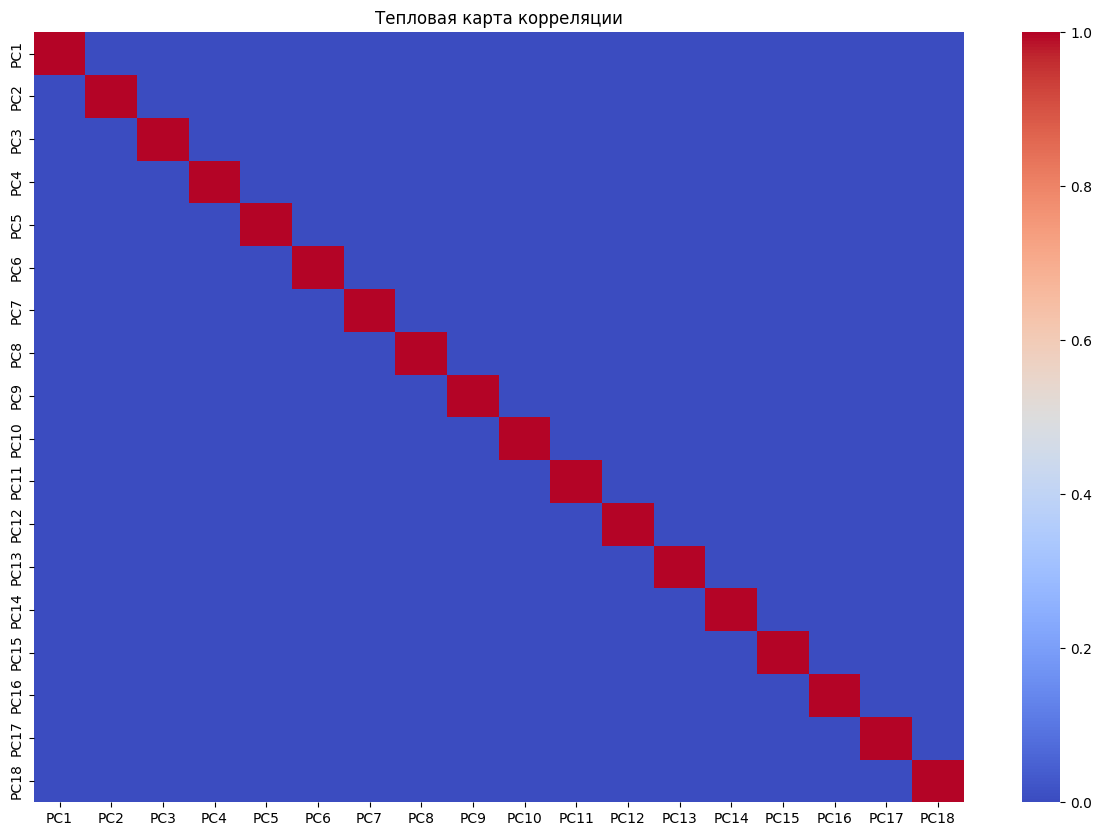

In [89]:
correlation_matrix = df_pca.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Тепловая карта корреляции')
plt.show()

чтото не так работает